**Translational Equivariance Exepriment**


In [26]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import cm 
from PIL import Image 
import cv2

In [24]:
# seed the pseudorandom number generator
from random import seed
from random import randint

# seed random number generator
seed(20) #fixing so the results do not change ecverytime

#example
print(randint(0,256))

77


73.50413133547461
(1, 100, 100)
<class 'numpy.int64'>
<class 'int'>
[93 31 33  4 82 38 91 45 95 22 38 58 24 93 91 77 47 17  9 27 25 13 40 86
 89]
[32 76 10 85 41 20 85 79 60 84 74 23 54 18 19 57 31 80 69 58 25 17  3 43
 96]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


<ipython-input-27-804ee794670a>:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  gray = cm.get_cmap('gray' , 256)


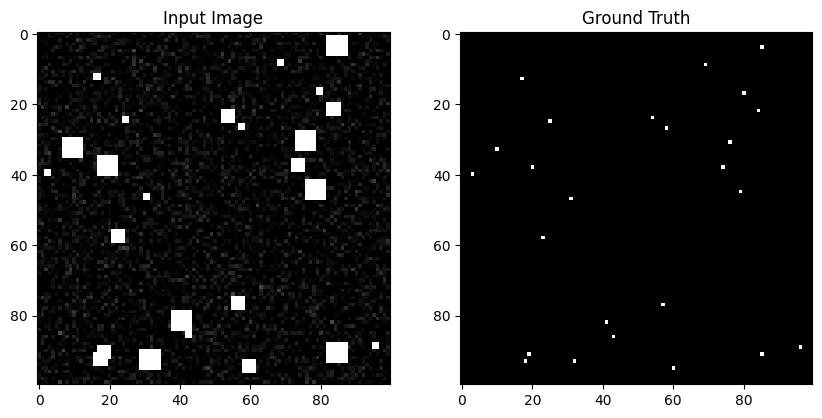

In [27]:
N=100                                              #size of the image 100x100

# Input Image (only one image for this experiment) consisiting of 25 patters at three scales
im = np.zeros([1,N,N])                             #input image wihtout noise
gauss = 255*np.random.normal(0,0.08,(1,N,N))       #noisy background - gaussian noise
print(np.amax(gauss))
gauss = gauss.reshape(1,N,N)

# Ground Truth Image
ground_truth = np.zeros([1,N,N])

noisy_im = im + gauss                             #inout image with noise
print(noisy_im.shape)

#Generating 25 random points on the image to be the centre of the 25 patters
row = np.zeros(25,'int')                         
col = np.zeros(25,'int')

for i in range(25):
  row[i] = randint(3,N-3)
  col[i] = randint(3,N-3)

print(type(row[1]))
print(type(randint(3,34)))
print(row)
print(col)

## --- Adding the patters to noisy image ---

# 8 patters of size 7x7
for k in range(8):
  print(k)
  ground_truth[:,row[k],col[k]] = 255
  for i in range(row[k]-3,row[k]+3):
    for j in range(col[k]-3,col[k]+3):
      noisy_im[:,i,j] = 255
  

# 8 patters of size 5x5
for k in range(8,16):
  print(k)
  ground_truth[:,row[k],col[k]] = 255
  for i in range(row[k]-2,row[k]+2):
    for j in range(col[k]-2,col[k]+2):
      noisy_im[:,i,j] = 255

# 9 patters of size 3x3
for k in range(16,25):
  print(k)
  ground_truth[:,row[k],col[k]] = 255
  for i in range(row[k]-1,row[k]+1):
    for j in range(col[k]-1,col[k]+1):
      noisy_im[:,i,j] = 255


# Plotting
gray = cm.get_cmap('gray' , 256) 
Input_Image = Image.fromarray((noisy_im[0,:,:]).astype(np.double))
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1,2, 1)
plt.imshow(Input_Image, cmap=gray)
plt.title('Input Image')

Ground_Truth = Image.fromarray((ground_truth[0,:,:]).astype(np.double))
fig.add_subplot(1,2, 2)
plt.imshow(Ground_Truth, cmap=gray)
plt.title('Ground Truth')
plt.show()



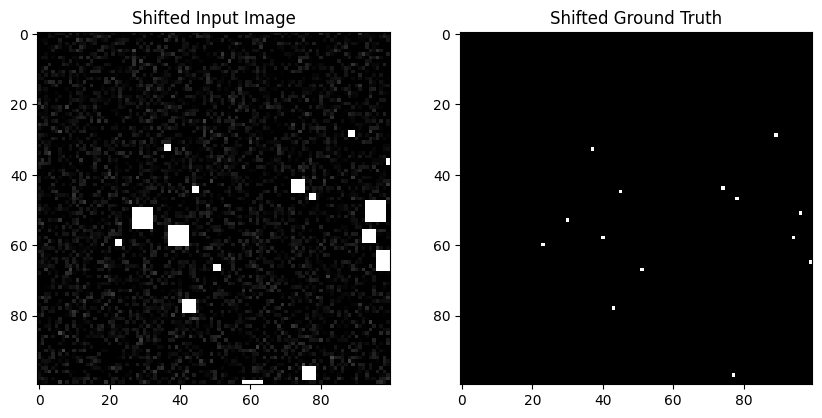

In [28]:
# Constructing the shifted image

shiftednoisy_im = np.zeros([1,N,N]) + gauss
shiftedground_truth = np.zeros([1,N,N])

low = 20                                                #shifting the image by 20 pixels in both the directions

for i in range(low,N):
  for j in range(low,N):
    shiftednoisy_im[:,i,j] = noisy_im[:,i-low,j-low]
    shiftedground_truth[:,i,j] = ground_truth[:,i-low,j-low]

shifted_InputImage = Image.fromarray((shiftednoisy_im[0,:,:]).astype(np.double))
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1,2, 1)
plt.imshow(shifted_InputImage, cmap=gray)
plt.title('Shifted Input Image')

shifted_GroundTruth = Image.fromarray((shiftedground_truth[0,:,:]).astype(np.double))
fig.add_subplot(1,2, 2)
plt.imshow(shifted_GroundTruth, cmap=gray)
plt.title('Shifted Ground Truth')
plt.show()

In [29]:
# Snce we are using Pytorch, we make the dimensions compatible 

rr2 = np.expand_dims(noisy_im, 1)
print(rr2.shape)
qq2 = np.expand_dims(ground_truth,1)
print(qq2.shape)
print(type(rr2))

rr2 = torch.from_numpy(rr2)#.cuda()
qq2 = torch.from_numpy(qq2)#.cuda()

rr2 = rr2.float()
qq2 = qq2.float()

(1, 1, 100, 100)
(1, 1, 100, 100)
<class 'numpy.ndarray'>


In [30]:
# Since we are using Pytorch, we make the dimensions compatible 
#shifted 
rr2s = np.expand_dims(shiftednoisy_im, 1)
print(rr2s.shape)
qq2s = np.expand_dims(shiftedground_truth,1)
print(qq2s.shape)

rr2s = torch.from_numpy(rr2s)#.cuda()
qq2s = torch.from_numpy(qq2s)#.cuda()

rr2s = rr2s.float()
qq2s = qq2s.float()

(1, 1, 100, 100)
(1, 1, 100, 100)


In [31]:
import torch  
import torch.nn as nn  
from torch import relu
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.conv = nn.Conv2d(1, 1, kernel_size=(7,7),padding = "same")
        self.pool = nn.MaxPool2d(2)
        self.upsample = nn.Upsample(scale_factor=2, mode='nearest')
        self.batchnorm = nn.BatchNorm2d(1)
        self.relu = nn.ReLU()


    def forward(self, x):
        x = self.relu(self.conv(x))
        x = self.pool(x)
        x = self.upsample(x)
        x = self.batchnorm(x)
        return x


model = NeuralNet()

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

print(model)
epochs = 100
for i in range(epochs):  
    ypred = model.forward(rr2)
    loss = criterion(ypred,qq2)  

    optimizer.zero_grad()  
    loss.backward()  
    optimizer.step() 

for i in range(epochs):  
    ypreds = model.forward(rr2s)
    loss=criterion(ypreds,qq2s)  

    optimizer.zero_grad()  
    loss.backward()  
    optimizer.step() 


NeuralNet(
  (conv): Conv2d(1, 1, kernel_size=(7, 7), stride=(1, 1), padding=same)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (upsample): Upsample(scale_factor=2.0, mode='nearest')
  (batchnorm): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
)


Following four blocks are for ACDA layer

In [1]:
!pip install config

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install fb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for fb: filename=fb-0.4.0-py3-none-any.whl size=7159 sha256=3c922b40bb8d579e7f90a5a5206385acea91a53da837ea60a794822cb44449a4
  Stored in directory: /root/.cache/pip/wheels/49/cd/23/e665d689c81d1485aa0d2aac72e7a27bbb28f0b99694c5554b
Successfully built fb


In [3]:
'''
The code is directly taken from https://github.com/ZeWang95/ACDA, which was translated from the matlab code 
https://github.com/xycheng/DCFNet/blob/master/calculate_FB_bases.m
'''
##-----------------------FUNCTION TO CREATE FB BASES-------------------------------------------------------

import numpy as np 
from scipy import special
import pdb
from config import *

def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return (phi, rho)

def calculate_FB_bases(L1):
	maxK = (2 * L1 + 1)**2 - 1

	L = L1 + 1
	R = L1 + 0.5

	truncate_freq_factor = 1.5

	if L1 < 2:
		truncate_freq_factor = 2

	xx, yy = np.meshgrid(range(-L, L+1), range(-L, L+1))

	xx = xx/R
	yy = yy/R

	ugrid = np.concatenate([yy.reshape(-1,1), xx.reshape(-1,1)], 1)
	tgrid, rgrid = cart2pol(ugrid[:,0], ugrid[:,1])

	num_grid_points = ugrid.shape[0]

	kmax = 15

	bessel = np.load('./bessel.npy')

	B = bessel[(bessel[:,0] <=kmax) & (bessel[:,3]<= np.pi*R*truncate_freq_factor)]

	idxB = np.argsort(B[:,2])

	mu_ns = B[idxB, 2]**2

	ang_freqs = B[idxB, 0]
	rad_freqs = B[idxB, 1]
	R_ns = B[idxB, 2]

	num_kq_all = len(ang_freqs)
	max_ang_freqs = max(ang_freqs)

	Phi_ns=np.zeros((num_grid_points, num_kq_all), np.float32)

	Psi = []
	kq_Psi = []
	mdash_bases=0

	for i in range(B.shape[0]):
		ki = ang_freqs[i]
		qi = rad_freqs[i]
		rkqi = R_ns[i]

		r0grid=rgrid*R_ns[i]

		F = special.jv(ki, r0grid)

		Phi = 1./np.abs(special.jv(ki+1, R_ns[i]))*F

		Phi[rgrid >=1]=0

		Phi_ns[:, i] = Phi

		if ki == 0:
			Psi.append(Phi)
			kq_Psi.append([ki,qi,rkqi])
			mdash_bases = mdash_bases+1

		else:
			Psi.append(Phi*np.cos(ki*tgrid)*np.sqrt(2))
			Psi.append(Phi*np.sin(ki*tgrid)*np.sqrt(2))
			kq_Psi.append([ki,qi,rkqi])
			kq_Psi.append([ki,qi,rkqi])
			mdash_bases = mdash_bases+2

	Psi = np.array(Psi)
	kq_Psi = np.array(kq_Psi)

	mdash_bases = Psi.shape[1]

	if mdash_bases > maxK:
		Psi = Psi[:maxK]
		kq_Psi = kq_Psi[:maxK]
	mdash_bases = Psi.shape[0]
	p = Psi.reshape(mdash_bases, 2*L+1, 2*L+1).transpose(1,2,0)
	psi = p[1:-1, 1:-1, :]
	# print(psi.shape)
	psi = psi.reshape((2*L1+1)**2, mdash_bases)

	c = np.sqrt(np.sum(psi**2, 0).mean())

	psi = psi/c

	return psi, c, kq_Psi


In [39]:
#--------------------------------------------ACDA LAYER------------------------------

#since I ran the experiments first with the existing acda layer code, 
#and a few variables, like layer name conv_DCDF, were used in all the experiments, 
#I did not change those variables to avoid mistakes within the experiment

#add bessel.npy before running this

#importing libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init
from torch.nn.utils import spectral_norm
from torch.autograd import Variable
from torch.nn.parameter import Parameter

import math
import scipy as sp
import scipy.linalg as linalg
import numpy as np
import pdb
from fb import *
import matplotlib as plt

class Conv_DCFD(nn.Module):

    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0, num_bases=6, 
                 bias=True, dilation=1, groups=1):
      
        super(Conv_DCFD, self).__init__()

        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding
        self.num_bases = num_bases
        self.dilation = dilation
        self.groups = groups

        #creating the bases_list containing 6*(kernel_size//2) (example for kernel size 7x7 the total bases would be 18)

        list_size = kernel_size // 2
        bases_list = []

        for i in range(list_size):
            kss = (i+1)*2+1
            FB_bases, _, _ = calculate_FB_bases(i+1)    #calculating FB bases
            FB_bases = FB_bases.transpose().reshape(-1, kss, kss).astype(np.float32)[:num_bases, ...]
            pad = list_size - (i+1)
            bases1 = torch.Tensor(FB_bases)
            bases1 = F.pad(bases1, (pad, pad, pad, pad, 0, 0)).view(num_bases, kernel_size*kernel_size)
            bases_list.append(bases1)
            
        bases = torch.cat(bases_list,0)
        bases_size = num_bases * len(bases)
        ## bases created

        self.register_buffer('bases', torch.Tensor(bases).float())
        self.tem_size = len(bases)
        
        inter = max(64, bases_size//2)    #channels for convolution
        
        #------NOW DECOMPOSING THE PER_PIXEL ADAPTIVE FILTER INTO DYNAMIC ATOMS AND COMPOSITIONAL COEFFICIENTS-------

        #COMPOSITIONAL COEFFICIENTS

        self.compositional_coef = Parameter(torch.Tensor(out_channels, in_channels*num_bases, 1, 1))  #2d with size c'xcm 


        #CREATING THE ATOM GENERATION NETWORK
        
        #we decompose the dynamic filter into pre-fixed bases and basis coefficients
        # atom_gen outputs the coefficients a, corresponding to all bases

        self.atom_gen = nn.Sequential(
            nn.Conv2d(in_channels, inter, kernel_size=self.kernel_size, padding=1, stride=stride),  #change kernelsize
            nn.BatchNorm2d(inter),
            nn.Tanh(),
            nn.Conv2d(inter, bases_size, kernel_size=3, padding=1),  # keep the kernel_size fixed as 3
            nn.BatchNorm2d(bases_size),
            nn.Tanh()
            )

        if bias:
            self.bias = Parameter(torch.Tensor(out_channels))
        else:
            self.register_parameter('bias', None)


    def forward(self, input):
        N, C, H, W = input.shape

        H = (H + 2 * self.padding - self.dilation * (self.kernel_size - 1) - 1)//self.stride + 1
        W = (W + 2 * self.padding - self.dilation * (self.kernel_size - 1) - 1)//self.stride + 1
        M = self.num_bases
        

        drop_rate = 0.0
   
        #LAYER 1
        #get the bases generated using atom generation network
        bases = self.atom_gen(F.dropout2d(input, p=drop_rate, training=self.training)).view(N, self.num_bases, self.tem_size, H, W) # BxMxMxHxW
       
        self.bases_coef = bases.cpu().data.numpy() #basis coefficients

        bases = torch.einsum('bmkhw, kl->bmlhw', bases, self.bases)
        self.bases_save = bases.cpu().data.numpy()

        x = F.unfold(F.dropout2d(input, p=drop_rate, training=self.training), kernel_size=self.kernel_size, stride=self.stride, padding=self.padding).view(N, self.in_channels, self.kernel_size*self.kernel_size, H, W)
        
        #get the intermediate feature Z of size cmxhxw
        intermediate_layer = torch.einsum('bmlhw, bclhw-> bcmhw', bases.view(N, self.num_bases, -1, H, W), x).reshape(N, self.in_channels*self.num_bases, H, W)
        intermediate_layer = F.dropout2d(intermediate_layer, p=drop_rate, training=self.training)

        #change padding for every kernel size to have the output of the same for every kernel_size
        pad = ((self.kernel_size - 3)/2)//self.stride
        pad = int(pad)

        #LAYER 2
        #convolution  of Z with compositional coeff
        output = F.conv2d(intermediate_layer, self.compositional_coef, self.bias,stride=self.stride, padding=pad, dilation=self.dilation, groups=self.groups)

        return output



torch.Size([1, 10, 25, 25])
torch.Size([1, 3, 100, 100])


In [35]:
class NeuralNet1(nn.Module):
    def __init__(self):
        super(NeuralNet1, self).__init__()

        self.acda = Conv_DCFD(1, 1, kernel_size=7, padding=1, stride=1, bias=True)#.cuda()
        self.upsample = nn.Upsample(scale_factor=2, mode='nearest')
        self.batchnorm = nn.BatchNorm2d(1)
        self.relu = nn.ReLU()


    def forward(self, x):
        x = self.acda(x)
        x = self.batchnorm(x)
        return x


model1 = NeuralNet1()

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model1.parameters(), lr=0.01, momentum=0.9)

print(model1)
epochs = 100
for i in range(epochs):  
    ypred_acda = model1.forward(rr2)  
    loss = criterion(ypred_acda,qq2)  

    optimizer.zero_grad()  
    loss.backward()  
    optimizer.step() 

for i in range(epochs):  
    ypreds_acda = model1.forward(rr2s)  
    loss = criterion(ypreds_acda,qq2s)  

    optimizer.zero_grad()  
    loss.backward()  
    optimizer.step() 

NeuralNet1(
  (acda): Conv_DCFD(
    (atom_gen): Sequential(
      (0): Conv2d(1, 64, kernel_size=(7, 7), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): Tanh()
      (3): Conv2d(64, 108, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(108, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): Tanh()
    )
    (drop): Bases_Drop()
  )
  (upsample): Upsample(scale_factor=2.0, mode='nearest')
  (batchnorm): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
)


torch.Size([1, 1, 100, 100])
(100, 100)


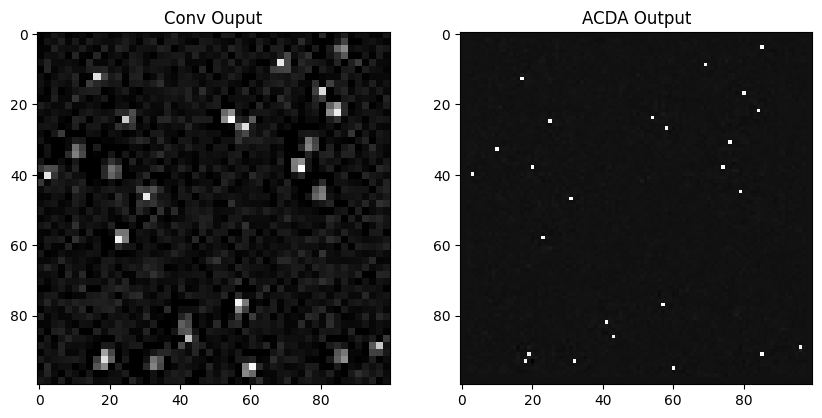

In [34]:
from torch import tensor

print(ypred.shape)

output = ypred[0,:,:,:]
output1 = ypred_acda[0,:,:,:]

tensor_image = output.squeeze()
tensor_image1 = output1.squeeze()
# tensor_image.cpu().detach().numpy()

tensor_image = tensor_image.cpu()
tensor_image1 = tensor_image1.cpu()

np_arr = tensor_image.detach().cpu().numpy()
np_arr1 = tensor_image1.detach().cpu().numpy()

print(np_arr.shape)
# tensor_image = tensor_image.view(tensor_image.shape[1], tensor_image.shape[2])
# print(type(tensor_image), tensor_image.shape)

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1,2, 1)
plt.imshow(np_arr,cmap=gray)
plt.title('Conv Ouput')

# Ground_Truth = Image.fromarray((ground_truth[0,:,:]).astype(np.double))
fig.add_subplot(1,2, 2)
plt.imshow(np_arr1, cmap=gray)
plt.title('ACDA Output')
plt.show()

torch.Size([1, 1, 100, 100])
(100, 100)


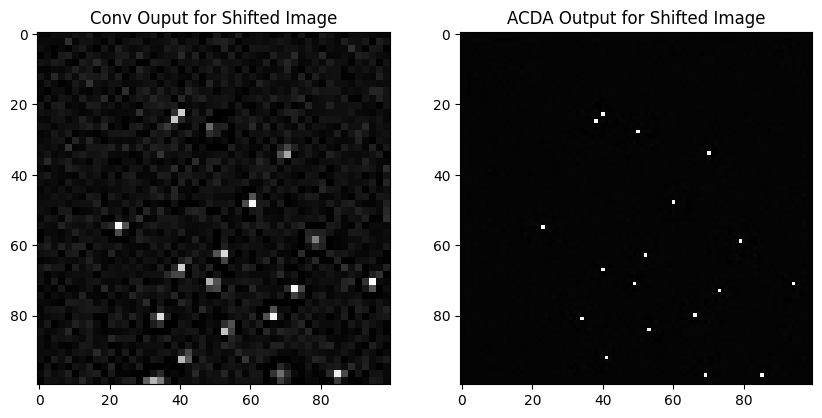

In [ ]:
from torch import tensor

print(ypreds.shape)

outputs = ypreds[0,:,:,:]
output1s = ypreds_acda[0,:,:,:]

tensor_images = outputs.squeeze()
tensor_image1s = output1s.squeeze()
# tensor_image.cpu().detach().numpy()

tensor_image = tensor_image.cpu()
tensor_image1s = tensor_image1s.cpu()

np_arrs = tensor_images.detach().cpu().numpy()
np_arr1s = tensor_image1s.detach().cpu().numpy()

print(np_arrs.shape)
# tensor_image = tensor_image.view(tensor_image.shape[1], tensor_image.shape[2])
# print(type(tensor_image), tensor_image.shape)

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1,2, 1)
plt.imshow(np_arrs,cmap=gray)
plt.title('Conv Ouput for Shifted Image')

# Ground_Truth = Image.fromarray((ground_truth[0,:,:]).astype(np.double))
fig.add_subplot(1,2, 2)
plt.imshow(np_arr1s, cmap=gray)
plt.title('ACDA Output for Shifted Image')
plt.show()

NeuralNet2(
  (acda): Conv_DCFD(
    (atom_gen): Sequential(
      (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): Tanh()
      (3): Conv2d(64, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(36, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): Tanh()
    )
  )
  (upsample): Upsample(scale_factor=2.0, mode='nearest')
  (batchnorm): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
)
(100, 100)


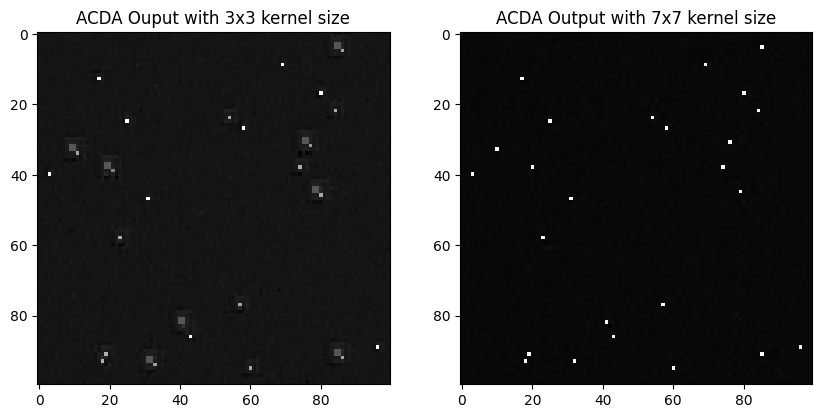

In [40]:
from torch import tensor

#comapring kernel sizes


class NeuralNet2(nn.Module):
    def __init__(self):
        super(NeuralNet2, self).__init__()
        self.acda = Conv_DCFD(1, 1, kernel_size=3, padding=1, stride=1, bias=True)#.cuda()
        self.upsample = nn.Upsample(scale_factor=2, mode='nearest')
        self.batchnorm = nn.BatchNorm2d(1)
        self.relu = nn.ReLU()


    def forward(self, x):
        x = self.acda(x)
        x = self.batchnorm(x)
        return x

model2 = NeuralNet2()

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=0.01, momentum=0.9)

print(model2)
epochs = 100
for i in range(epochs):  
    ypred_acda3 = model2.forward(rr2)  
    loss = criterion(ypred_acda3,qq2)  

    optimizer.zero_grad()  
    loss.backward()  
    optimizer.step() 

for i in range(epochs):  
    ypreds_acda3 = model2.forward(rr2s)  
    loss = criterion(ypreds_acda3,qq2s)  

    optimizer.zero_grad()  
    loss.backward()  
    optimizer.step() 



output = ypred_acda3[0,:,:,:]
output1 = ypred_acda[0,:,:,:]

tensor_image = output.squeeze()
tensor_image1 = output1.squeeze()
# tensor_image.cpu().detach().numpy()

tensor_image = tensor_image.cpu()
tensor_image1 = tensor_image1.cpu()

np_arr = tensor_image.detach().cpu().numpy()
np_arr1 = tensor_image1.detach().cpu().numpy()

print(np_arr.shape)
# tensor_image = tensor_image.view(tensor_image.shape[1], tensor_image.shape[2])
# print(type(tensor_image), tensor_image.shape)

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1,2, 1)
plt.imshow(np_arr,cmap=gray)
plt.title('ACDA Ouput with 3x3 kernel size')

# Ground_Truth = Image.fromarray((ground_truth[0,:,:]).astype(np.double))
fig.add_subplot(1,2, 2)
plt.imshow(np_arr1, cmap=gray)
plt.title('ACDA Output with 7x7 kernel size')
plt.show()